In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# Considering only U-friction velocity(WUSURF) as input
data = pd.read_excel("resultsWUSURF.xlsx", header=None)
X = data.iloc[:, : -2].values
Yval = data.iloc[:, -2].values.reshape(-1, 1)
Ydepth = data.iloc[:, -1].values.reshape(-1, 1)

In [4]:
X_train1, X_test1, Y_val, Y_test_val = train_test_split(X, Yval, test_size=.3, random_state=41)
X_train2, X_test2, Y_depth, Y_test_depth = train_test_split(X, Ydepth, test_size=.3, random_state=41)

In [5]:
data.columns=['friction_velocity','max_value of diffusivity','depth at Max_diffusivity']
data.head(20)

,friction_velocity,max_value of diffusivity,depth at Max_diffusivity
0,-0.500000,16.752294,-30.5
1,-0.498996,16.735466,-30.5
2,-0.497992,16.718621,-30.5
3,-0.496988,16.701760,-30.5
4,-0.495984,16.684881,-30.5
5,-0.494980,16.667985,-30.5
6,-0.493976,16.651072,-30.5
7,-0.492972,16.634141,-30.5
8,-0.491968,16.617194,-30.5
9,-0.490964,16.600229,-30.5


In [6]:
forest1=RandomForestRegressor(n_estimators=2000, criterion='squared_error',max_depth=100,min_samples_split=2,min_samples_leaf=1)
forest2=RandomForestRegressor(n_estimators=2000, criterion='squared_error',max_depth=100,min_samples_split=2, min_samples_leaf=1)

forest1.fit(X_train1,Y_val.ravel())
forest2.fit(X_train2,Y_depth.ravel())


RandomForestRegressor(max_depth=100, n_estimators=2000)

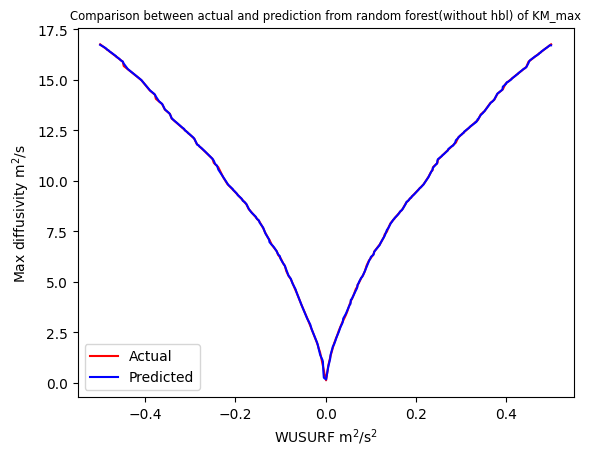

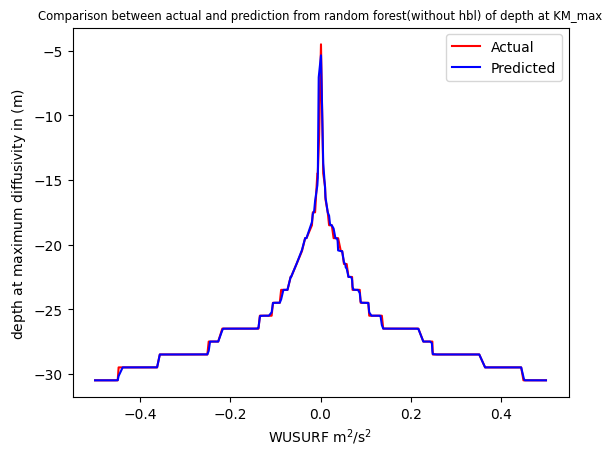

In [7]:
plt.figure(1)
plt.plot(sorted(X_test1[:, 0]), Y_test_val[np.argsort(X_test1[:, 0])], color='red', label='Actual')
plt.plot(sorted(X_test1[:, 0]), forest1.predict(X_test1)[np.argsort(X_test1[:, 0])], color='blue',
         label='Predicted')

plt.legend()
plt.xlabel('WUSURF $\mathregular{m^{2}/s^{2}}$')
plt.ylabel('Max diffusivity $\mathregular{m^{2}/s}$ ')
plt.title('Comparison between actual and '
          'prediction from random forest(without hbl) of KM_max', fontsize='small')
plt.savefig('Max_diffusivity without hbl.png')
plt.show()

plt.figure(2)
plt.plot(sorted(X_test2[:, 0]), Y_test_depth[np.argsort(X_test2[:, 0])], color='red', label='Actual')
plt.plot(sorted(X_test2[:, 0]), forest2.predict(X_test2)[np.argsort(X_test2[:, 0])], color='blue',
         label='Predicted')

plt.legend()
plt.xlabel('WUSURF $\mathregular{m^{2}/s^{2}}$')
plt.ylabel('depth at maximum diffusivity in ($\mathregular{m}$) ')
plt.title('Comparison between actual and '
          'prediction from random forest(without hbl) of depth at KM_max', fontsize='small')
plt.savefig('depthh at max diffusivity without hbl.png')
plt.show()

predictions_value=forest1.predict(X_test1)
predictions_depth=forest2.predict(X_test2)

In [33]:
diffusion_val_error=mean_squared_error(Y_test_val, predictions_value)
depth_error=mean_squared_error(Y_test_depth, predictions_depth)
print('diffusion_val_error with only WUSURF',diffusion_val_error)
print('depth_error with only WUSURF',depth_error)


diffusion_val_error with only WUSURF 0.0019474757312559557
depth_error with only WUSURF 0.2335567997916666


In [34]:
# Considering only HBL as input

data = pd.read_excel("resultshbl.xlsx", header=None)
X1 = data.iloc[:, : -2].values
Yval1 = data.iloc[:, -2].values.reshape(-1, 1)
Ydepth1 = data.iloc[:, -1].values.reshape(-1, 1)

In [35]:
X_train11, X_test11, Y_val1, Y_test_val1 = train_test_split(X1, Yval1, test_size=.3, random_state=41)
X_train21, X_test21, Y_depth1, Y_test_depth1 = train_test_split(X1, Ydepth1, test_size=.3, random_state=41)

In [36]:
data.columns=['hbl','max_value of diffusivity','depth at Max_diffusivity']

data.head(4)

,hbl,max_value of diffusivity,depth at Max_diffusivity
0,90.5,16.752294,-30.5
1,90.5,16.735466,-30.5
2,90.5,16.718621,-30.5
3,90.5,16.701760,-30.5


In [37]:
forest11=RandomForestRegressor(n_estimators=2000, criterion='squared_error',max_depth=100,min_samples_split=2,min_samples_leaf=1)
forest21=RandomForestRegressor(n_estimators=2000, criterion='squared_error',max_depth=100,min_samples_split=2, min_samples_leaf=1)

forest11.fit(X_train11,Y_val1.ravel())
forest21.fit(X_train21,Y_depth1.ravel())

RandomForestRegressor(max_depth=100, n_estimators=2000)

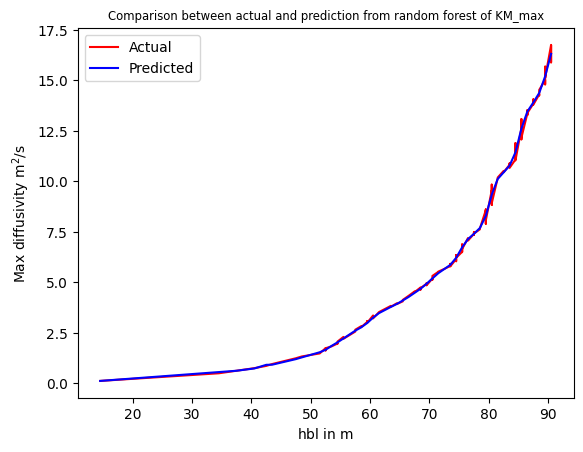

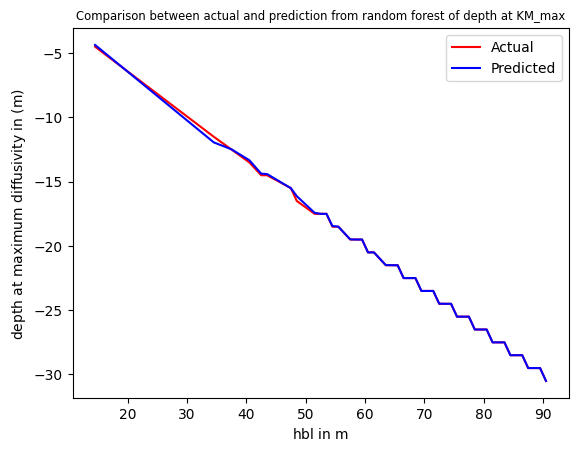

In [38]:
plt.figure(1)
plt.plot(sorted(X_test11[:, 0]), Y_test_val1[np.argsort(X_test11[:, 0])], color='red', label='Actual')
plt.plot(sorted(X_test11[:, 0]), forest11.predict(X_test11)[np.argsort(X_test11[:, 0])], color='blue',
         label='Predicted')

plt.legend()
plt.xlabel('hbl in $\mathregular{m}$')
plt.ylabel('Max diffusivity $\mathregular{m^{2}/s}$ ')
plt.title('Comparison between actual and '
          'prediction from random forest of KM_max', fontsize='small')
plt.show()

plt.figure(2)
plt.plot(sorted(X_test21[:, 0]), Y_test_depth1[np.argsort(X_test21[:, 0])], color='red', label='Actual')
plt.plot(sorted(X_test21[:, 0]), forest21.predict(X_test21)[np.argsort(X_test21[:, 0])], color='blue',
         label='Predicted')

plt.legend()
plt.xlabel('hbl in $\mathregular{m}$')
plt.ylabel('depth at maximum diffusivity in ($\mathregular{m}$) ')
plt.title('Comparison between actual and '
          'prediction from random forest of depth at KM_max', fontsize='small')
plt.show()

predictions_value1=forest11.predict(X_test11)
predictions_depth1=forest21.predict(X_test21)

In [39]:
diffusion_val_error1=mean_squared_error(Y_test_val1, predictions_value1)
depth_error1=mean_squared_error(Y_test_depth1, predictions_depth1)
print('diffusion_val_error with only hbl',diffusion_val_error1)
print('depth_error only with  hbl',depth_error1)


diffusion_val_error with only hbl 0.046721188367488176
depth_error only with  hbl 0.0014519918750000042
